In [50]:
import numpy as np
import tensorflow as tf
from utils import get_accuracy_by_digit
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
# Change the reference dir to the root folder
import os
os.chdir('../')

In [29]:
#data
X, y_true = np.load('data/img_array_cadu.npy'), np.load('data/y_true_cadu.npy') 

In [15]:
#models
oldmodel = tf.keras.models.load_model('models/default_mnist_model.h5', compile=False)
newmodel = tf.keras.models.load_model('models/tuned-mnist.h5', compile=False)

oldmodel.compile()
newmodel.compile()

In [44]:
old_y_pred = np.argmax(oldmodel.predict(X), axis=1)

10/10 [==============================] - 1s 14ms/step


In [45]:
new_y_pred = np.argmax(newmodel.predict(X), axis=1)

10/10 [==============================] - 1s 14ms/step


In [46]:
get_accuracy_by_digit(old_y_pred, y_true)

y_true
0    0.166667
1    0.923077
2    0.739726
3    0.409091
4    0.571429
5    0.666667
6    0.875000
7    0.111111
8    0.967742
9    0.000000
Name: right, dtype: float64

In [47]:
get_accuracy_by_digit(new_y_pred, y_true)

y_true
0    0.333333
1    0.973684
2    0.933333
3    0.944444
4    0.555556
5    0.948276
6    0.960000
7    0.230769
8    1.000000
9    0.600000
Name: right, dtype: float64

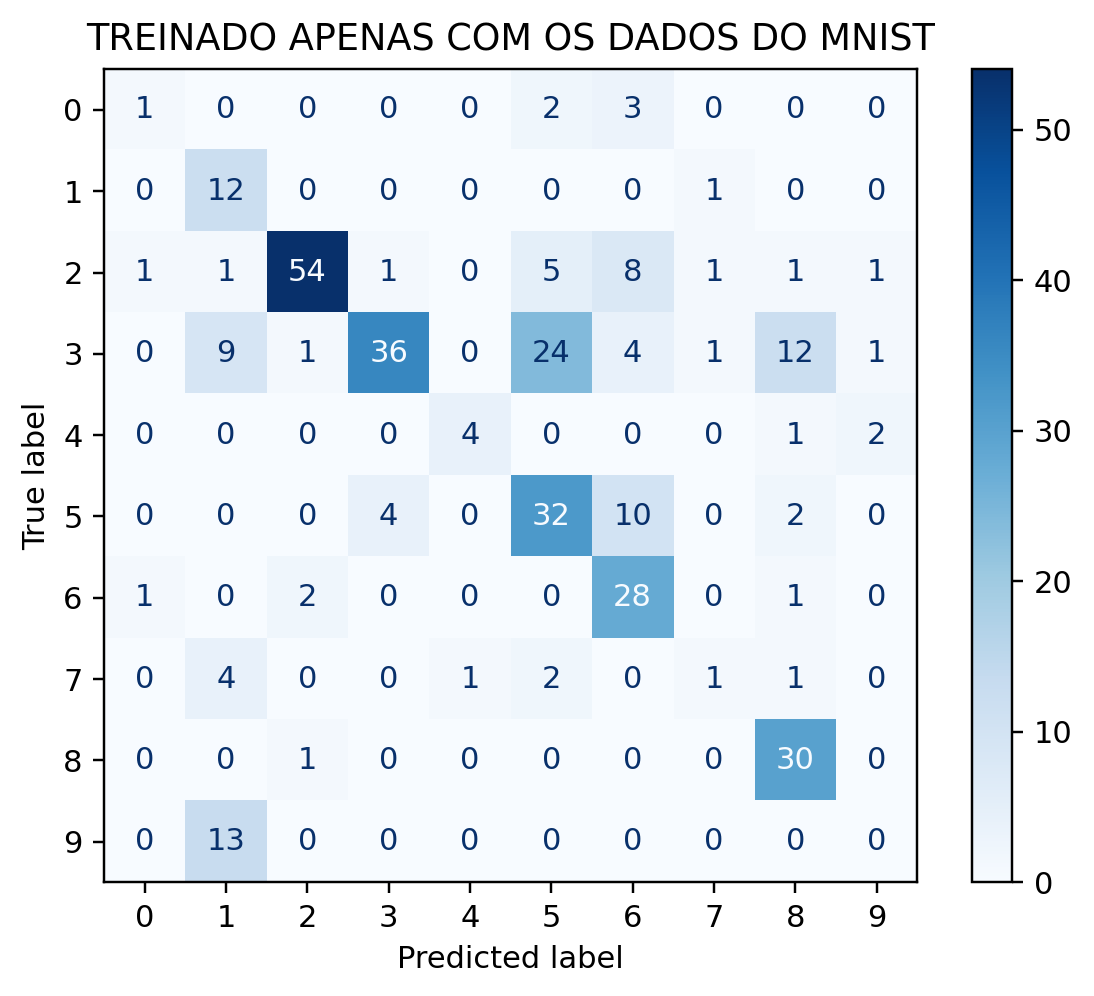

In [57]:
fig, ax = plt.subplots(dpi=220)
ConfusionMatrixDisplay.from_predictions(old_y_pred, y_true, cmap='Blues', ax=ax)
plt.title('TREINADO APENAS COM OS DADOS DO MNIST')
plt.show()

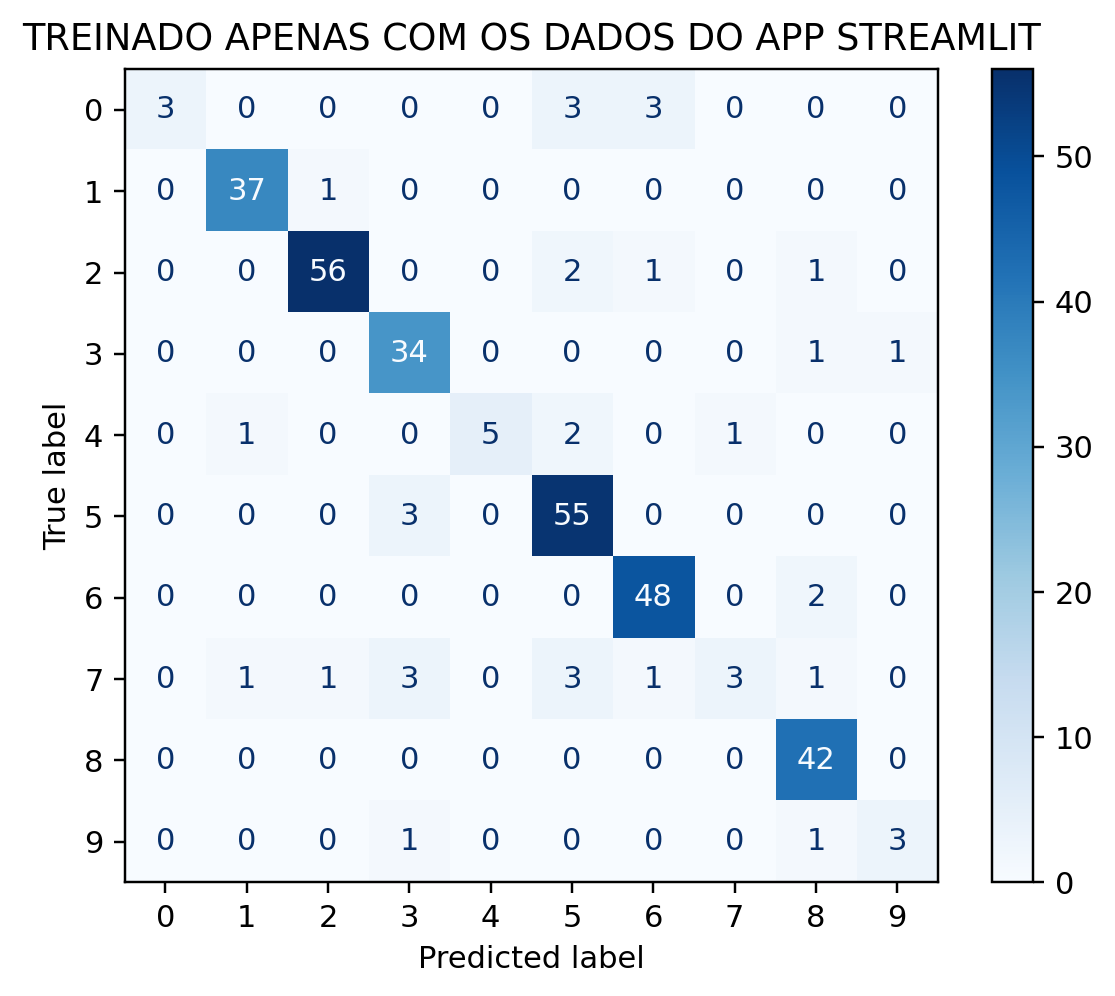

In [58]:
fig, ax = plt.subplots(dpi=220)
ConfusionMatrixDisplay.from_predictions(new_y_pred, y_true, cmap='Blues', ax=ax)
plt.title('TREINADO APENAS COM OS DADOS DO APP STREAMLIT')
plt.show()